<a href="https://colab.research.google.com/github/mharcoshungria/pucminas-credit-risk/blob/main/pucminas_credit_risk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Projeto Integrado:** Uso de Inteligência Artificial na Análise de Crédito

## 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from yellowbrick.classifier import ConfusionMatrix
from sklearn.metrics import accuracy_score, classification_report

## 2. Dataset

__Feature Name__: Description

* __person_age__: Idade do indivíduo solicitante
* __person_income__: Renda anual do solicitante.
* __person_home_ownership__: Situação de posse da moradia do solicitante. Valores possíveis: 'MORTGAGE', 'RENT', 'OWN', 'OTHER'
* __person_emp_length__: Tempo de emprego em anos
* __loan_intent__: Propósito da aplicação do empréstimo
* __loan_grade__: Classificação atribuída ao empréstimo
* __loan_amnt__: Valor do empréstimo solicitado
* __loan_int_rate__: Taxa de juros do empréstimo
* __loan_status__: Status do empréstimo, onde 0 representa não inadimplente e 1 representa inadimplente
* __loan_percent_income__: Proporção entre o valor do empréstimo e a renda anual
* __cb_person_default_on_file__: Histórico de inadimplência
* __cb_preson_cred_hist_length__: Extensão do histórico de crédito do solicitante

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/mharcoshungria/pucminas-credit-risk/main/credit_risk_dataset.csv")

df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


## 3. Exploratory Analysis

In [3]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [5]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [6]:
df.duplicated().sum()

165

In [7]:
df.corr(numeric_only=True)

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
person_age,1.000000,0.173202,0.163106,0.050787,0.012580,-0.021629,-0.042411,0.859133
person_income,0.173202,1.000000,0.134268,0.266820,0.000792,-0.144449,-0.254471,0.117987
person_emp_length,0.163106,0.134268,1.000000,0.113082,-0.056405,-0.082489,-0.054111,0.144699
loan_amnt,0.050787,0.266820,0.113082,1.000000,0.146813,0.105376,0.572612,0.041967
loan_int_rate,0.012580,0.000792,-0.056405,0.146813,1.000000,0.335133,0.120314,0.016696
loan_status,-0.021629,-0.144449,-0.082489,0.105376,0.335133,1.000000,0.379366,-0.015529
loan_percent_income,-0.042411,-0.254471,-0.054111,0.572612,0.120314,0.379366,1.000000,-0.031690
cb_person_cred_hist_length,0.859133,0.117987,0.144699,0.041967,0.016696,-0.015529,-0.031690,1.000000


## 4. Visualization

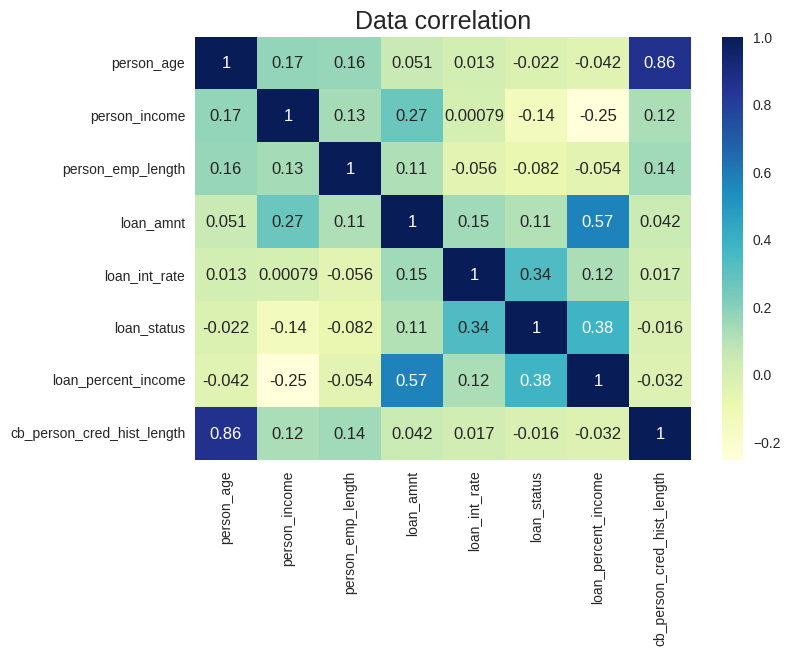

In [8]:
dataplot = sns.heatmap(df.corr(numeric_only=True), cmap='YlGnBu', annot=True)
plt.title('Data correlation', fontsize=18)
plt.show()

Text(0.5, 1.0, 'Loan Status')

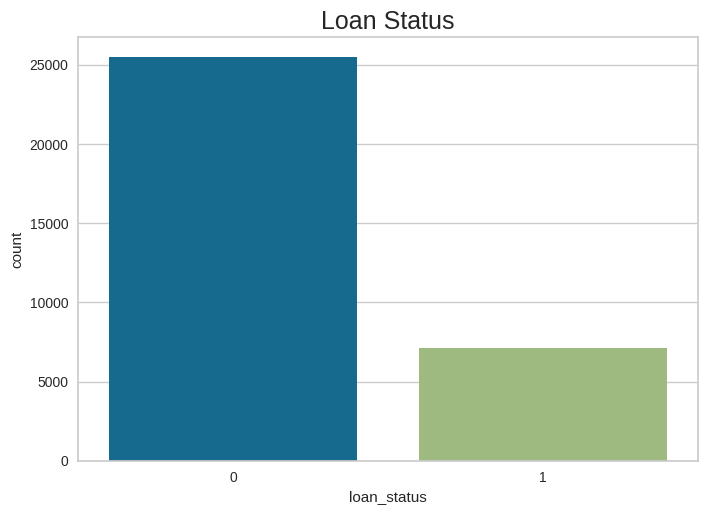

In [9]:
sns.countplot(x=df['loan_status'])
plt.title('Loan Status', fontsize=18)

Text(0.5, 1.0, 'Home ownership')

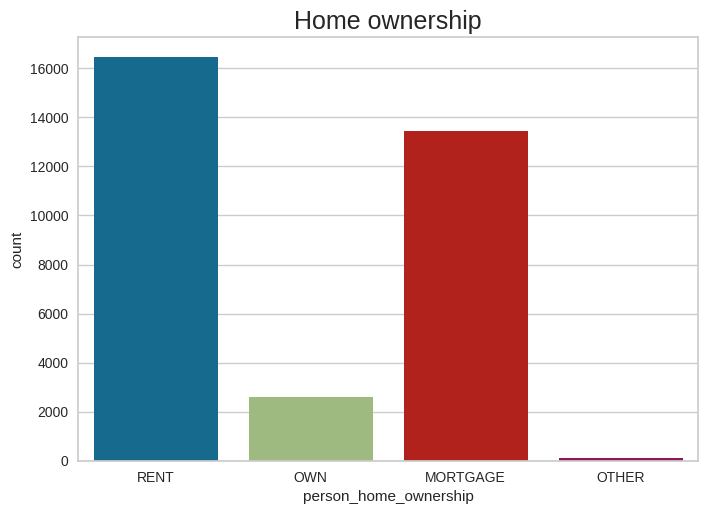

In [10]:
sns.countplot(x=df['person_home_ownership'])
plt.title('Home ownership', fontsize=18)

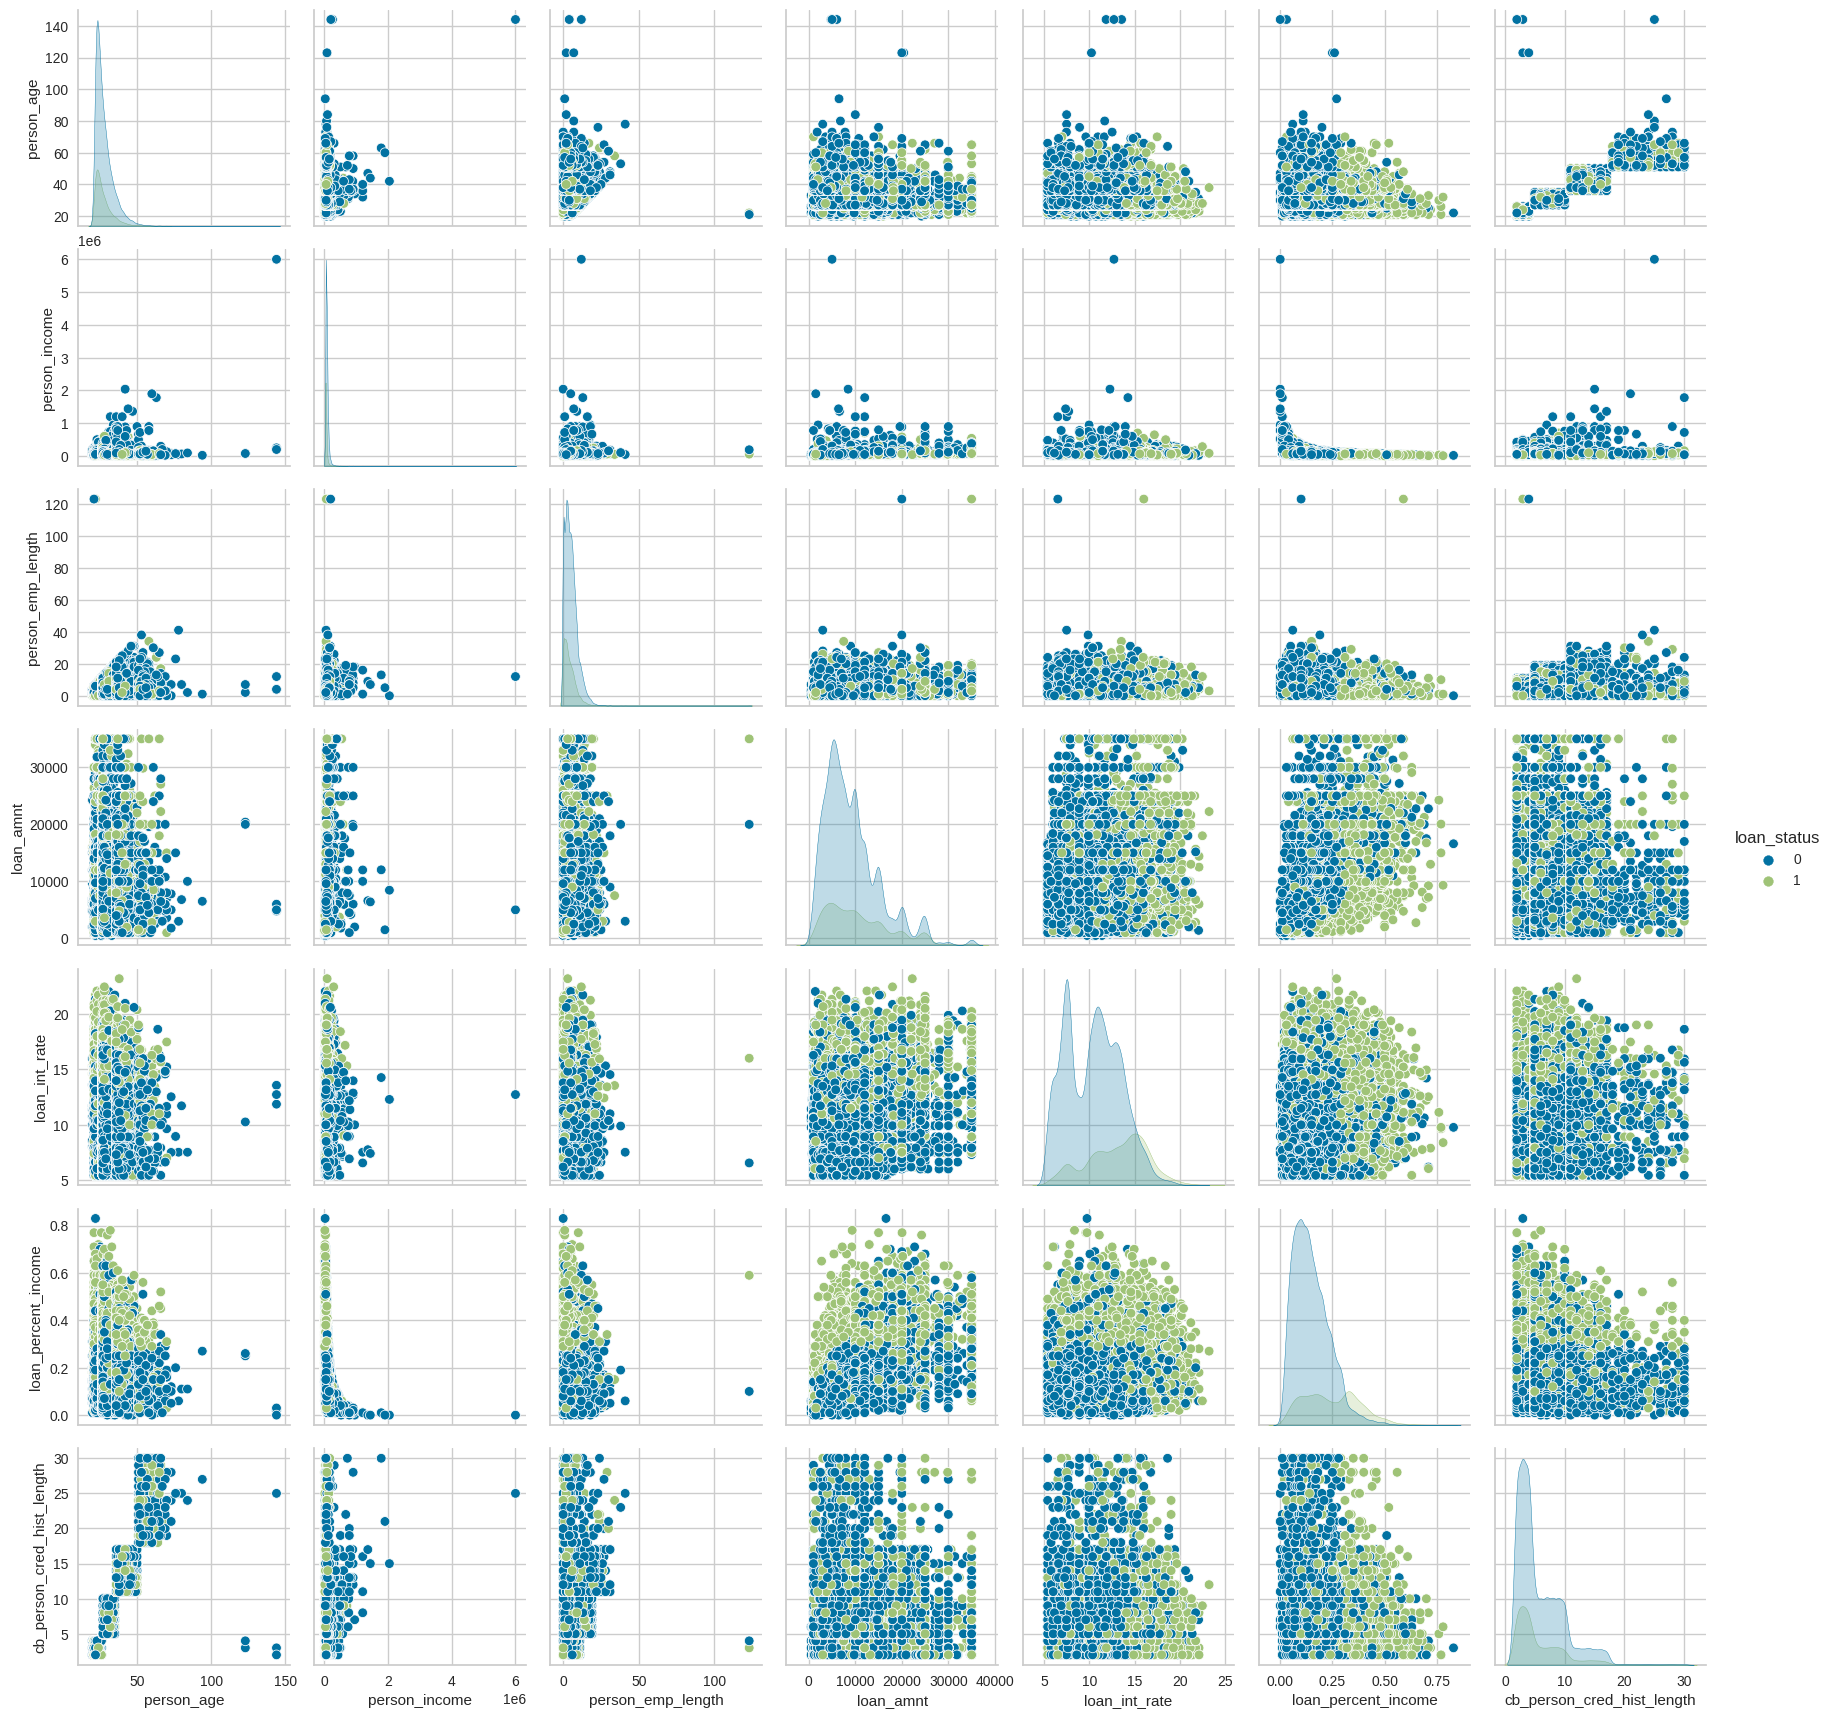

In [12]:
sns.pairplot(df, hue='loan_status')

## 5. Data Cleaning

In [13]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

Preenchendo valores ausentes com a média:

In [14]:
df.loc[df['loan_int_rate'].isnull(), 'loan_int_rate'] = df['loan_int_rate'].median()
df.loc[df['person_emp_length'].isnull(), 'person_emp_length'] = df['person_emp_length'].median()

In [15]:
df.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

### 5.1 Finding outliers

In [16]:
df['person_age'].max()

144

Assumir que indivíduos com idade > 90 anos são erros

In [17]:
df = df.loc[df['person_age'] < 90]

In [20]:
df['person_emp_length'].max()

123.0

O emprego não pode ser superior à idade do indivíduo (contabilizando a infância)

In [21]:
df = df.loc[df['person_emp_length'] < df['person_age'] - 10]

### 5.2 Creating groups

In [22]:
df['income_group'] = pd.cut(df['person_income'], bins=
                           [0, 25000, 50000, 75000, 100000, float('inf')],
                           labels=['low', 'l-middle', 'middle', 'h-middle', 'high'])

In [23]:
df['income_group']

1             low
2             low
3          middle
4          middle
5             low
           ...   
32576      middle
32577        high
32578    h-middle
32579        high
32580    l-middle
Name: income_group, Length: 32573, dtype: category
Categories (5, object): ['low' < 'l-middle' < 'middle' < 'h-middle' < 'high']

In [27]:
df['loan_amnt_group'] = pd.cut(df['loan_amnt'], bins=
                                 [0, 10000, 15000, float('inf')],
                                 labels=['small', 'medium', 'large'])

In [28]:
df['loan_amnt_group']

1         small
2         small
3         large
4         large
5         small
          ...  
32576     small
32577     large
32578     large
32579    medium
32580     small
Name: loan_amnt_group, Length: 32573, dtype: category
Categories (3, object): ['small' < 'medium' < 'large']

In [29]:
df['loan_to_income'] = df['loan_amnt'] / df['person_income']
df['loan_to_income']

1        0.104167
2        0.572917
3        0.534351
4        0.643382
5        0.252525
           ...   
32576    0.109434
32577    0.146875
32578    0.460526
32579    0.100000
32580    0.154167
Name: loan_to_income, Length: 32573, dtype: float64

### 6. Data Processing and Encoding

In [30]:
y_credit = df['loan_status']
X_credit = df.drop(['loan_status'], axis=1)

In [31]:
X_credit.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'income_group', 'loan_amnt_group',
       'loan_to_income'],
      dtype='object')

In [32]:
label_encode_cols = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file', 'income_group', 'loan_amnt_group']
label_encoder = LabelEncoder()

for col in label_encode_cols:
    X_credit[col] = label_encoder.fit_transform(X_credit[col])

X_credit = pd.get_dummies(X_credit, columns=label_encode_cols)

In [33]:
X_credit.head(1)

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_to_income,person_home_ownership_0,person_home_ownership_1,...,cb_person_default_on_file_0,cb_person_default_on_file_1,income_group_0,income_group_1,income_group_2,income_group_3,income_group_4,loan_amnt_group_0,loan_amnt_group_1,loan_amnt_group_2
1,21,9600,5.0,1000,11.14,0.1,2,0.104167,0,0,...,1,0,0,0,0,1,0,0,0,1


In [34]:
scaler = StandardScaler()
X_credit = scaler.fit_transform(X_credit)

In [35]:
X_credit[0]

array([-1.08431905, -1.07135424,  0.06011078, -1.35882993,  0.04235685,
       -0.65757719, -0.93862187, -0.62027139, -0.83817674, -0.05740867,
        3.40670664, -1.00953181, -0.43645173,  2.01228593, -0.35277141,
       -0.47857149, -0.45166294, -0.46133602, -0.70312158,  1.45520795,
       -0.49713938, -0.3538708 , -0.17463574, -0.08633606, -0.04436987,
        0.46270583, -0.46270583, -0.40900104, -0.38490188, -0.74434894,
        3.49258302, -0.64744047, -0.42205715, -0.48113759,  0.71642421])

In [36]:
X_training, X_test, y_training, y_test = train_test_split(X_credit, y_credit, test_size= 0.2, random_state=0)

In [37]:
X_training.shape, y_training.shape

((26058, 35), (26058,))

## 7. Over Sampling

In [38]:
from imblearn.over_sampling import SMOTE

In [39]:
smote = SMOTE(sampling_strategy='minority')
X_over, y_over = smote.fit_resample(X_credit, y_credit)

In [40]:
X_training_o, X_test_o, y_training_o, y_test_o = train_test_split(X_over, y_over, test_size = 0.2, stratify=y_over)

## 8. Prediction Models:

### 8.1 Logistic Regression

In [66]:
from sklearn.linear_model import LogisticRegression

In [67]:
logistic = LogisticRegression(random_state=1)
logistic.fit(X_training, y_training)

LogisticRegression(random_state=1)

In [68]:
logistic.intercept_

array([-1.91329537])

### 8.2 Decision Tree

In [72]:
from sklearn.tree import DecisionTreeClassifier

In [73]:
decision_tree = DecisionTreeClassifier(criterion='entropy', random_state = 0)
decision_tree.fit(X_training, y_training)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [74]:
predict_decision_tree = decision_tree.predict(X_test)

### 8.3 SVM

In [69]:
from sklearn.svm import SVC

In [70]:
svm = SVC(kernel='rbf', random_state=1, C=2)
svm.fit(X_training, y_training)

SVC(C=2, random_state=1)

## 9. Results

**A avaliação é baseada nas métricas escolhidas previamente, que fornecem insights claros sobre o desempenho dos modelos.**

- Logistic Regression: Apesar de sua simplicidade, a regressão logística demonstrou resultados notáveis, com boa precisão e recall equilibrados para ambas as classes. Isso pode ser atribuído à sua capacidade de mapear relações lineares entre variáveis.

- Decision Tree: A árvore de decisão revelou uma alta precisão, mas com recall ligeiramente menor para a classe de inadimplentes. Isso sugere uma tendência a identificar casos negativos com mais eficácia do que positivos.

- SVM: O modelo SVM apresentou um desempenho sólido em termos de precisão e recall, com uma abordagem eficaz para lidar com relações não lineares entre as variáveis.


Além disso, podemos visualizar a matriz de confusão para o modelo, o que nos permite ter uma ideia mais clara de como o modelo está se saindo em cada classe.


### 9.1 Logistic Regression - 87.26%

0.8726016884113584

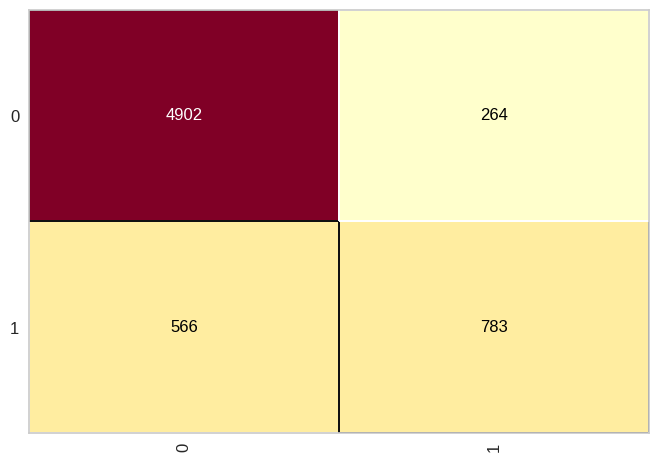

In [71]:
cm = ConfusionMatrix(logistic)
cm.fit(X_training, y_training)
cm.score(X_test, y_test)

### 9.2 Decision Tree - 89.40%

0.8940905602455871

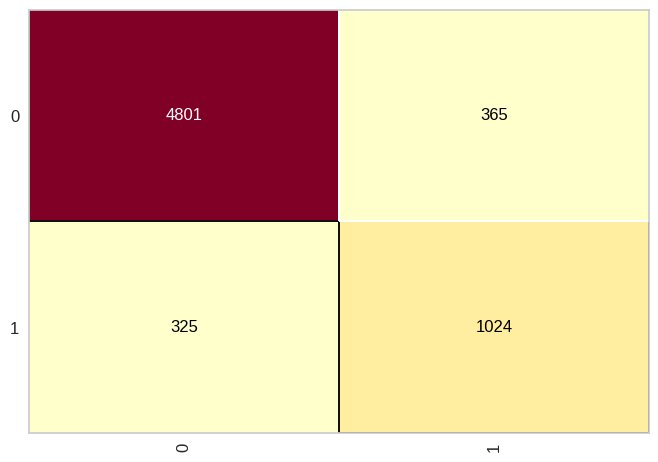

In [76]:
cm = ConfusionMatrix(decision_tree)
cm.fit(X_training, y_training)
cm.score(X_test, y_test)

### 9.3 SVM - 91.45%

0.9145049884881044

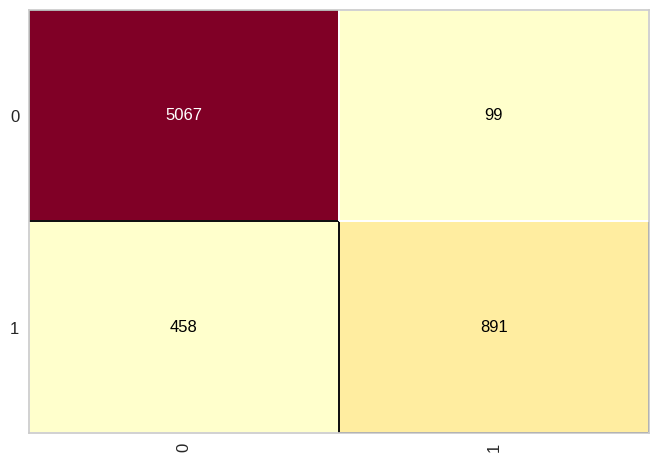

In [75]:
cm = ConfusionMatrix(svm)
cm.fit(X_training, y_training)
cm.score(X_test, y_test)

## 10. Conclusion

i) Este trabalho mergulhou na aplicação de técnicas de Inteligência Artificial e Aprendizado de Máquina na análise de crédito, um aspecto vital para a economia, sociedade e empresas. O processo de avaliar a probabilidade de inadimplência desempenha um papel crucial na mitigação de riscos financeiros, permitindo um funcionamento fluido dos sistemas de crédito.

ii) O crédito é um pilar da economia, proporcionando a indivíduos e empresas as ferramentas necessárias para investir, expandir e prosperar. Uma análise precisa de crédito promove a confiança entre os participantes econômicos e é fundamental para a sustentabilidade dos mercados financeiros. Portanto, este trabalho não apenas aborda uma técnica de modelagem, mas também toca em um elemento vital para o crescimento econômico.

iii) A eficiência e confiabilidade dos modelos desenvolvidos foram cuidadosamente avaliadas, proporcionando um panorama claro de suas capacidades e limitações. Ao considerar métricas e matrizes de confusão, foi possível avaliar o desempenho de cada modelo e tomar decisões informadas para sua implementação.

iv) O aspecto sério deste trabalho é inegável, pois trata de decisões financeiras críticas que impactam diretamente a vida das pessoas e a saúde financeira das instituições. É imperativo que os modelos sejam precisos, justos e livres de vieses prejudiciais. Vieses como machismo e racismo podem ser inadvertidamente incorporados nos modelos, afetando injustamente certos grupos. Uma análise crítica e constante é necessária para garantir que as decisões tomadas por esses modelos sejam imparciais e éticas.

v) Em conclusão, este trabalho não apenas revelou a eficácia das técnicas de Aprendizado de Máquina na análise de crédito, mas também destacou a importância vital do crédito na economia, bem como os desafios éticos e sociais associados à modelagem. Ao fornecer insights sobre as limitações, vieses potenciais e considerações éticas, este trabalho busca fornecer uma visão holística da aplicação da Inteligência Artificial na análise de crédito, buscando contribuir para um sistema financeiro mais justo e equitativo.